In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_excel("electricity bill.xlsx")
data.head()


,Month,Units_Consumed,Fixed_Charge,Rate_per_Unit,Peak_Hours_Units,OffPeak_Hours_Units,Customer_Type,Region,Year,Bill_Amount
0,1,152,150,7.0,103,169,Residential,North,2022,1300.5
1,2,485,150,7.0,199,182,Commercial,North,2023,741.5
2,3,320,150,7.0,153,70,Residential,East,2023,2782.5
3,4,156,150,6.5,185,56,Residential,East,2023,735.0
4,5,121,150,6.0,94,158,Residential,West,2024,689.5


,Month,Units_Consumed,Fixed_Charge,Rate_per_Unit,Peak_Hours_Units,OffPeak_Hours_Units,Customer_Type,Region,Year,Bill_Amount
0,1,152,150,7.0,103,169,Residential,North,2022,1300.5
1,2,485,150,7.0,199,182,Commercial,North,2023,741.5
2,3,320,150,7.0,153,70,Residential,East,2023,2782.5
3,4,156,150,6.5,185,56,Residential,East,2023,735.0
4,5,121,150,6.0,94,158,Residential,West,2024,689.5


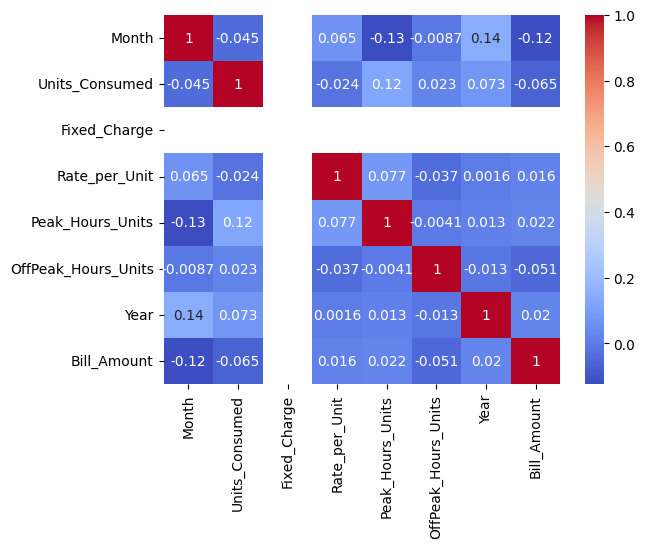

In [11]:
seaa = data.drop(columns=['Customer_Type','Region'])
sns.heatmap(seaa.corr(), annot=True, cmap='coolwarm')
data.head()

In [12]:
data.head()


,Month,Units_Consumed,Fixed_Charge,Rate_per_Unit,Peak_Hours_Units,OffPeak_Hours_Units,Customer_Type,Region,Year,Bill_Amount
0,1,152,150,7.0,103,169,Residential,North,2022,1300.5
1,2,485,150,7.0,199,182,Commercial,North,2023,741.5
2,3,320,150,7.0,153,70,Residential,East,2023,2782.5
3,4,156,150,6.5,185,56,Residential,East,2023,735.0
4,5,121,150,6.0,94,158,Residential,West,2024,689.5


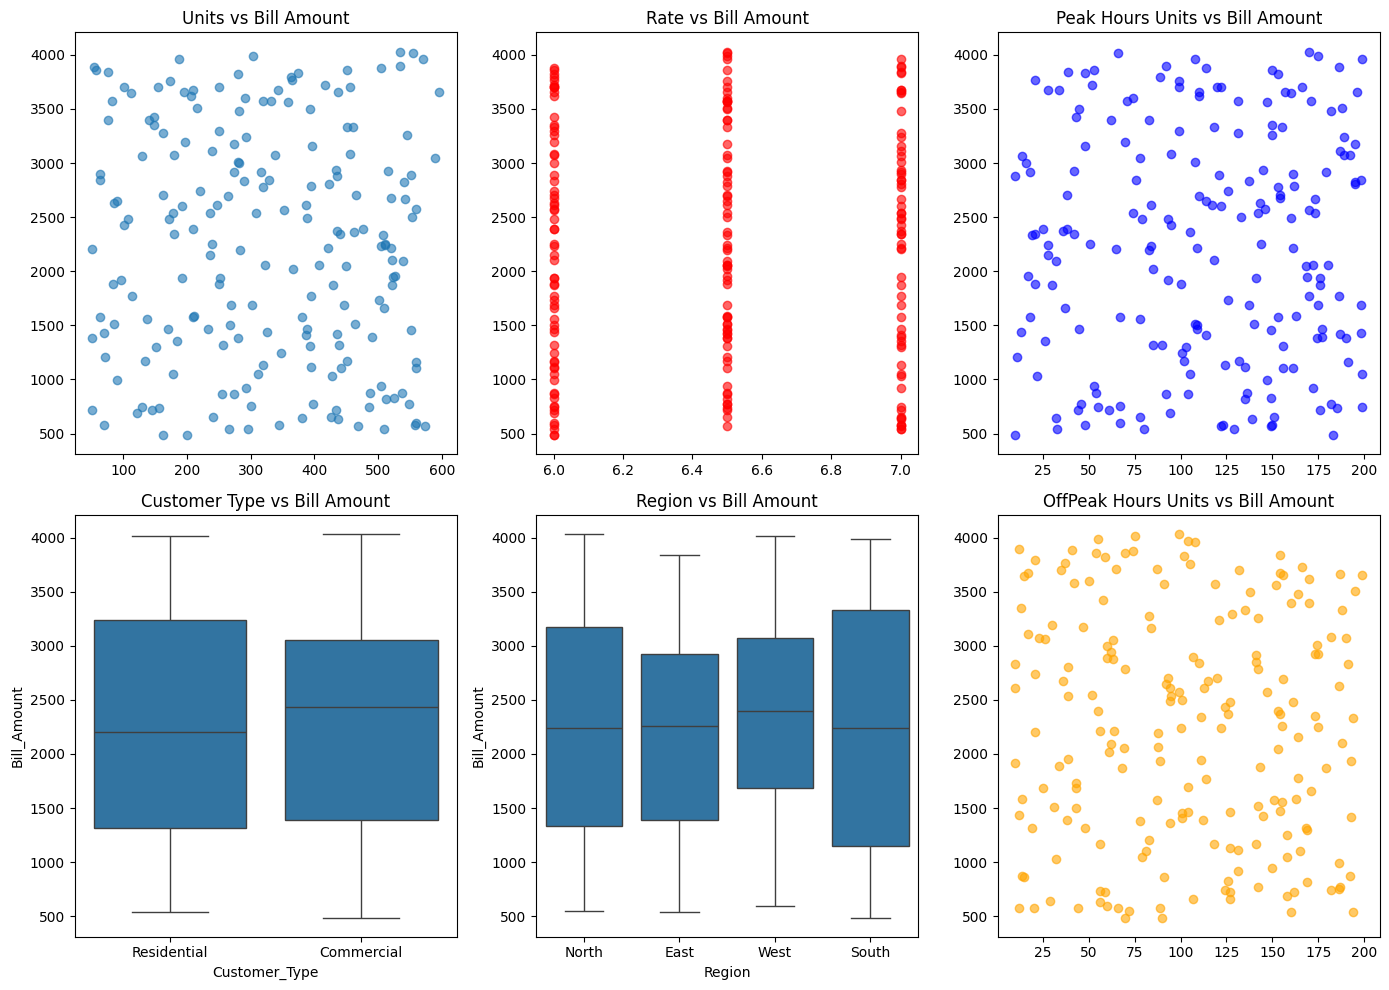

In [43]:
fig, axs = plt.subplots(2, 3, figsize=(14, 10))

# Numeric features: use scatter
axs[0, 0].scatter(data['Units_Consumed'], data['Bill_Amount'], alpha=0.6)
axs[0, 0].set_title('Units vs Bill Amount')

axs[0, 1].scatter(data['Rate_per_Unit'], data['Bill_Amount'], color='r', alpha=0.6)
axs[0, 1].set_title('Rate vs Bill Amount')

axs[0, 2].scatter(data['Peak_Hours_Units'], data['Bill_Amount'], color='b', alpha=0.6)
axs[0, 2].set_title('Peak Hours Units vs Bill Amount')

# Categorical features: use boxplot
sns.boxplot(x='Customer_Type', y='Bill_Amount', data=data, ax=axs[1, 0])
axs[1, 0].set_title('Customer Type vs Bill Amount')

sns.boxplot(x='Region', y='Bill_Amount', data=data, ax=axs[1, 1])
axs[1, 1].set_title('Region vs Bill Amount')

# Numeric feature
axs[1, 2].scatter(data['OffPeak_Hours_Units'], data['Bill_Amount'], color='orange', alpha=0.6)
axs[1, 2].set_title('OffPeak Hours Units vs Bill Amount')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Bill Amount')

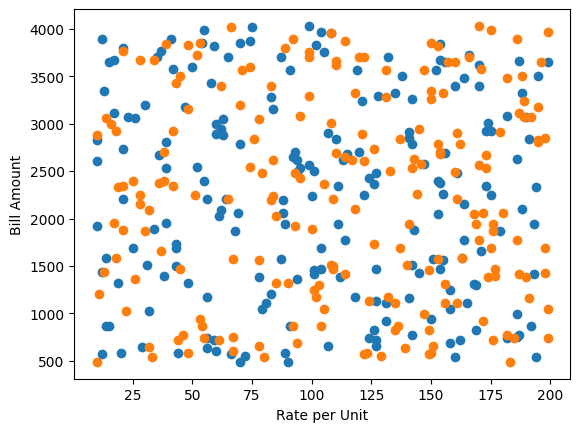

In [36]:
plt.plot(data['OffPeak_Hours_Units'], data['Bill_Amount'], 'o')
plt.xlabel('Units Consumed')
plt.ylabel('Bill Amount')
plt.plot(data['Peak_Hours_Units'], data['Bill_Amount'], 'o')
plt.xlabel('Rate per Unit')
plt.ylabel('Bill Amount')

Text(0, 0.5, 'Bill Amount')

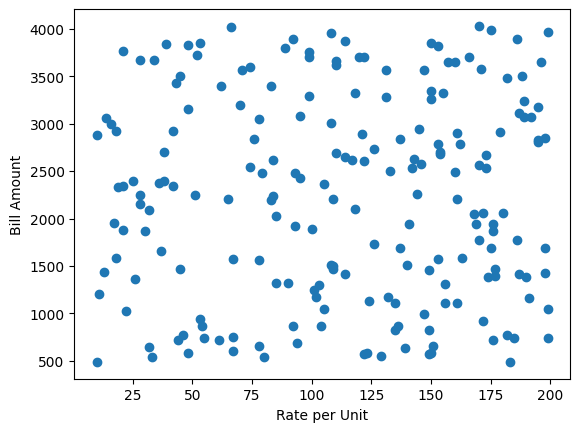

In [26]:
plt.plot(data['Peak_Hours_Units'], data['Bill_Amount'], 'o')
plt.xlabel('Rate per Unit')
plt.ylabel('Bill Amount')

C:\Users\hp\AppData\Local\Temp\ipykernel_50856\3157331440.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = data.pivot_table(


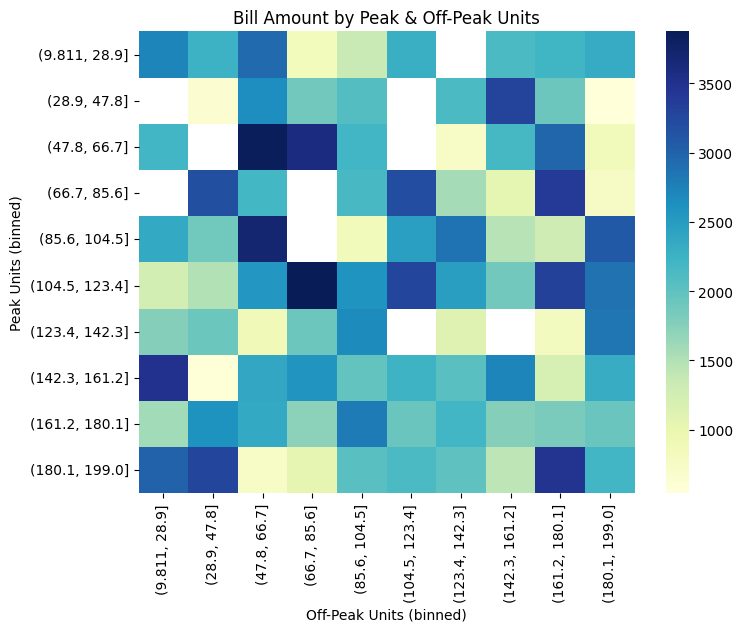

In [27]:
pivot = data.pivot_table(
    values='Bill_Amount',
    index=pd.cut(data['Peak_Hours_Units'], bins=10),
    columns=pd.cut(data['OffPeak_Hours_Units'], bins=10),
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, cmap="YlGnBu", annot=False)
plt.title("Bill Amount by Peak & Off-Peak Units")
plt.xlabel("Off-Peak Units (binned)")
plt.ylabel("Peak Units (binned)")
plt.show()


In [29]:
import pandas as pd


bins = [0, 40, 80, 120, 160, 200]   
labels = [1, 2, 3, 4, 5]            

data["Peak_Category"] = pd.cut(data["Peak_Hours_Units"], bins=bins, labels=labels)


bins = [0, 40, 80, 120, 160, 200]   
labels = [1, 2, 3, 4, 5]            

data["OffPeak_Category"] = pd.cut(data["OffPeak_Hours_Units"], bins=bins, labels=labels)

data

,Month,Units_Consumed,Fixed_Charge,Rate_per_Unit,Peak_Hours_Units,OffPeak_Hours_Units,Customer_Type,Region,Year,Bill_Amount,Peak_Category,OffPeak_Category
0,1,152,150,7.0,103,169,Residential,North,2022,1300.5,3,5
1,2,485,150,7.0,199,182,Commercial,North,2023,741.5,5,5
2,3,320,150,7.0,153,70,Residential,East,2023,2782.5,4,2
3,4,156,150,6.5,185,56,Residential,East,2023,735.0,5,2
4,5,121,150,6.0,94,158,Residential,West,2024,689.5,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,502,150,6.0,126,43,Commercial,East,2024,1736.0,4,2
196,5,86,150,6.0,143,186,Residential,East,2022,2626.5,4,5
197,6,209,150,6.5,67,87,Residential,North,2024,1573.5,2,3
198,7,58,150,6.0,53,54,Residential,South,2023,3855.0,2,2


In [33]:
data['peak_mean_values'] = data.groupby("Peak_Category", observed=False)["Bill_Amount"].transform('mean')
data['Offpeak_mean_values'] = data.groupby("OffPeak_Category", observed=False)["Bill_Amount"].transform('mean')
data

,Month,Units_Consumed,Fixed_Charge,Rate_per_Unit,Peak_Hours_Units,OffPeak_Hours_Units,Customer_Type,Region,Year,Bill_Amount,Peak_Category,OffPeak_Category,peak_mean_values,Offpeak_mean_values
0,1,152,150,7.0,103,169,Residential,North,2022,1300.5,3,5,2395.353659,2175.776316
1,2,485,150,7.0,199,182,Commercial,North,2023,741.5,5,5,2261.980000,2175.776316
2,3,320,150,7.0,153,70,Residential,East,2023,2782.5,4,2,2118.117021,2302.926829
3,4,156,150,6.5,185,56,Residential,East,2023,735.0,5,2,2261.980000,2302.926829
4,5,121,150,6.0,94,158,Residential,West,2024,689.5,3,4,2395.353659,2094.511111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,502,150,6.0,126,43,Commercial,East,2024,1736.0,4,2,2118.117021,2302.926829
196,5,86,150,6.0,143,186,Residential,East,2022,2626.5,4,5,2118.117021,2175.776316
197,6,209,150,6.5,67,87,Residential,North,2024,1573.5,2,3,2194.151515,2314.046512
198,7,58,150,6.0,53,54,Residential,South,2023,3855.0,2,2,2194.151515,2302.926829


In [48]:
data["Peak_to_OffPeak_Ratio"] = data["Peak_Hours_Units"] / (data["OffPeak_Hours_Units"] + 1e-6)
data["Weighted_Usage"] = (2 * data["Peak_Hours_Units"]) + (1 * data["OffPeak_Hours_Units"])
data

,Month,Units_Consumed,Fixed_Charge,Rate_per_Unit,Peak_Hours_Units,OffPeak_Hours_Units,Customer_Type,Region,Year,Bill_Amount,Peak_Category,OffPeak_Category,peak_mean_values,Offpeak_mean_values,Peak_to_OffPeak_Ratio,Weighted_Usage
0,1,152,150,7.0,103,169,Residential,North,2022,1300.5,3,5,2395.353659,2175.776316,0.609467,375
1,2,485,150,7.0,199,182,Commercial,North,2023,741.5,5,5,2261.980000,2175.776316,1.093407,580
2,3,320,150,7.0,153,70,Residential,East,2023,2782.5,4,2,2118.117021,2302.926829,2.185714,376
3,4,156,150,6.5,185,56,Residential,East,2023,735.0,5,2,2261.980000,2302.926829,3.303571,426
4,5,121,150,6.0,94,158,Residential,West,2024,689.5,3,4,2395.353659,2094.511111,0.594937,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,502,150,6.0,126,43,Commercial,East,2024,1736.0,4,2,2118.117021,2302.926829,2.930232,295
196,5,86,150,6.0,143,186,Residential,East,2022,2626.5,4,5,2118.117021,2175.776316,0.768817,472
197,6,209,150,6.5,67,87,Residential,North,2024,1573.5,2,3,2194.151515,2314.046512,0.770115,221
198,7,58,150,6.0,53,54,Residential,South,2023,3855.0,2,2,2194.151515,2302.926829,0.981481,160


In [61]:
X = (data.drop(columns=['Bill_Amount', 'Customer_Type', 'Region']))


y=data['Bill_Amount'].values

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)
pred = model.predict(X)

data['pred'] = pred


slope = model.coef_[0]
intercept = model.intercept_

print('slope=',slope)
print('intercept=',intercept)

from sklearn.metrics import r2_score
r2=r2_score(data['Bill_Amount'],data['pred'])
print('r2=',r2)
a=data['Bill_Amount'].mean()
print(a)
mean=data['pred'].mean()
print(mean)


slope= -37.597170451700535
intercept= -72079.90818918365
r2= 0.048050435750198295
2233.7375
2233.7374999999984


In [62]:
data

,Month,Units_Consumed,Fixed_Charge,Rate_per_Unit,Peak_Hours_Units,OffPeak_Hours_Units,Customer_Type,Region,Year,Bill_Amount,Peak_Category,OffPeak_Category,peak_mean_values,Offpeak_mean_values,Peak_to_OffPeak_Ratio,Weighted_Usage,pred
0,1,152,150,7.0,103,169,Residential,North,2022,1300.5,3,5,2395.353659,2175.776316,0.609467,375,2589.215287
1,2,485,150,7.0,199,182,Commercial,North,2023,741.5,5,5,2261.980000,2175.776316,1.093407,580,2437.979768
2,3,320,150,7.0,153,70,Residential,East,2023,2782.5,4,2,2118.117021,2302.926829,2.185714,376,2458.759602
3,4,156,150,6.5,185,56,Residential,East,2023,735.0,5,2,2261.980000,2302.926829,3.303571,426,2484.975422
4,5,121,150,6.0,94,158,Residential,West,2024,689.5,3,4,2395.353659,2094.511111,0.594937,346,2412.596079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,502,150,6.0,126,43,Commercial,East,2024,1736.0,4,2,2118.117021,2302.926829,2.930232,295,1977.565784
196,5,86,150,6.0,143,186,Residential,East,2022,2626.5,4,5,2118.117021,2175.776316,0.768817,472,2211.295702
197,6,209,150,6.5,67,87,Residential,North,2024,1573.5,2,3,2194.151515,2314.046512,0.770115,221,2374.301094
198,7,58,150,6.0,53,54,Residential,South,2023,3855.0,2,2,2194.151515,2302.926829,0.981481,160,2242.927175
